In [71]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

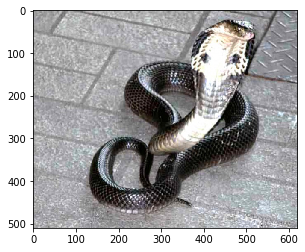

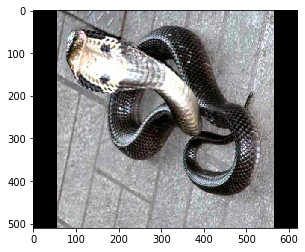

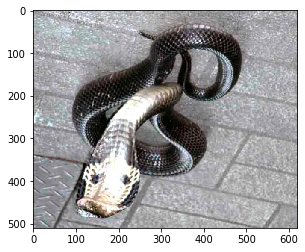

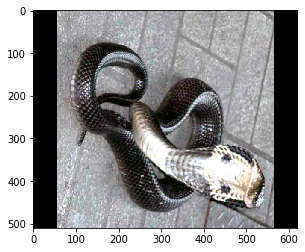

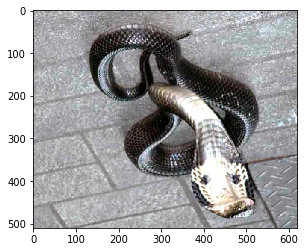

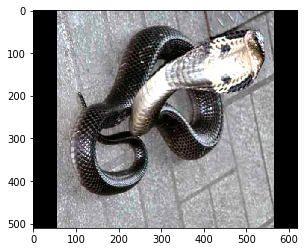

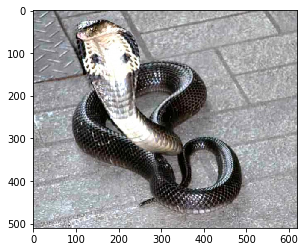

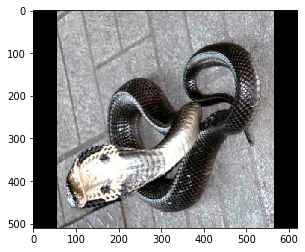

In [54]:
images = [image, image_flip]
for img in images:
    for r in [0, 90, 180, 270]:
        plt.figure()
        plt.imshow(img.rotate(r)) 

In [67]:
def load_images_from_folder(folders):
    class_images = []
    for folder in folders:
        images = []
        for filename in os.listdir(folder):
            img = Image.open(os.path.join(folder,filename))
            if img is not None:
                img = img.resize((299, 299))
                img_flip = ImageOps.flip(img)
                all_img = [img, img_flip]
                for i in all_img:
                    for r in [0, 90, 180, 270]:
                        images.append(np.array(i.rotate(r)))
        class_images.append(images)
        
    return class_images.copy()

In [56]:
def defined_input(class_images):
    features = []
    for images in class_images:
        for img in images:
            features.append(img)
    features = np.array(features)
    features = tf.keras.applications.inception_v3.preprocess_input(features, data_format=None)
    return features

In [57]:
#เตรียม output
def defined_output(class_images):
    label = []
    for count, images in enumerate(class_images):
        for i in range(len(images)):
            classes = len(class_images)
            output = np.zeros((classes,), dtype=int)
            output[count] = 1
            label.append(output)
    return np.array(label)

In [72]:
#change file path this.
foldersname = ['./images/class0 Cobra/Tail',
               './images/class1 KingCobra/Tail',
               './images/class2 BandedKrait/Tail',
               './images/class3 MalayanKrait/Tail',
               './images/class4 RussellViper/Tail',
               './images/class5 MalayanPitViper/Tail',
               './images/class6 WhiteLippedPitViper/Tail',
               './images/class7 Big-eyed pit viper/Tail',
               './images/class8 Trimeresurus [Popeia] phuketensis/Tail',
               './images/class9 Shore pit viper/Tail',
               './images/class10 Boiga nigriceps/Tail',
               './images/class11 Gold-ringed cat snake/Tail',
               './images/class12 Calliophis maculiceps/Tail',
               './images/class13 Bungarus flaviceps/Tail'
              ]
class_images = load_images_from_folder(foldersname)

X = np.copy(defined_input(class_images))
y = np.copy(defined_output(class_images))

In [73]:
X

array([[[[ 0.73333335,  0.77254903,  0.7254902 ],
         [ 0.7254902 ,  0.7647059 ,  0.73333335],
         [ 0.7254902 ,  0.7411765 ,  0.7411765 ],
         ...,
         [ 0.4666667 ,  0.48235297,  0.5058824 ],
         [ 0.45098042,  0.427451  ,  0.5294118 ],
         [ 0.427451  ,  0.39607847,  0.5294118 ]],

        [[ 0.7176471 ,  0.75686276,  0.6784314 ],
         [ 0.70980394,  0.7411765 ,  0.6862745 ],
         [ 0.7019608 ,  0.7411765 ,  0.7019608 ],
         ...,
         [ 0.4666667 ,  0.48235297,  0.5058824 ],
         [ 0.45882356,  0.45098042,  0.52156866],
         [ 0.4431373 ,  0.41176474,  0.5294118 ]],

        [[ 0.70980394,  0.7647059 ,  0.654902  ],
         [ 0.7019608 ,  0.75686276,  0.6627451 ],
         [ 0.7019608 ,  0.7490196 ,  0.6784314 ],
         ...,
         [ 0.45882356,  0.47450984,  0.4901961 ],
         [ 0.45882356,  0.4431373 ,  0.5137255 ],
         [ 0.45098042,  0.41176474,  0.5294118 ]],

        ...,

        [[-0.6313726 , -0.5764706 , -0

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout , GlobalAveragePooling2D

In [80]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(299,299,3))

base_model.trainable = False #Freeze Parameters

inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(14, activation='softmax')(x)

In [81]:
model = Model(inputs, predictions)

In [82]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [83]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [84]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
10/52 [====>.........................] - ETA: 3:26 - loss: 2.9075 - accuracy: 0.0656

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.save('./model/tail_v3.h5')